## Get the Resume to start analyzing

In [4]:
import PyPDF2
import spacy 


In [74]:
from PyPDF2 import PdfFileReader
    
resume = PdfFileReader(open("resume_h.pdf",'rb'))

In [75]:

pages = resume.getNumPages()
pages

1

In [76]:
pages_layout = resume.getPageLayout()
pages_layout

In [78]:
page_1 = resume.getPage(0)


In [27]:
!apt-get install tesseract-ocr


E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [79]:
import pytesseract
import pdf2image

In [85]:
pages = pdf2image.convert_from_bytes(open('resume_h.pdf', 'rb').read())
im_counter = 1
for page in pages:
    file = "page_" + str(im_counter)+  ".jpg"
    page.save(file,'JPEG')
    im_counter = im_counter+1
    

In [86]:
text = pytesseract.image_to_string('page_1.jpg', config='--psm 6')
sentences = text.split("\n")
sentences

['Computer vision engineer',
 'Computer vision engineer with mechatronics engineering background with huge enthusiasm about artificial',
 'intelligence.',
 'bouchelligamedhedi@gmail.com {] +216 26161678 Q Ariana, Tunisia in linkedin.com/in/bouchelligamedhedi',
 'PROFESSIONAL EXPERIENCES SKILLS',
 'Deep Learning engineer Programing languages : Python - C / C++ - Matlab',
 'Havensen',
 '03/2020 - Present tunisia ML frameworks : Tensoflow - Keras -Skearn - OpenCV',
 'Achievements/Tasks ACETATE',
 '— Apply deep learning j Machine oe apenas for multiple VANE ere nal Eker icra',
 'computer vision applications and text analyzing Far Poe (ate els as ree Pema',
 '- project 1: vehicle detection/tracking and license plate recognition',
 '- project 2: hand gestures recognition for google glass control Sea elit 2 icles See ened',
 '~ project 3 : Document scanning and text analyzing (payment checks, object detection techniques : YOLO V2,3,4- SSD -',
 'accident statements ) iaeea Cla Cora ue TarsTer 

In [93]:
nlp = spacy.load('en_core_web_sm')

In [94]:
doc_text = nlp(text)

In [97]:
for ent in doc_text.ents:
    print(ent.text,"#####", ent.label_)

Ariana ##### GPE
Tunisia ##### GPE
Deep Learning ##### PERSON
Havensen ##### PERSON
03/2020 ##### CARDINAL
ML ##### ORG
Tensoflow - Keras ##### ORG
Machine ##### NORP
VANE ##### PERSON
Far Poe ##### WORK_OF_ART
1 ##### CARDINAL
2 ##### CARDINAL
2 ##### CARDINAL
3 ##### CARDINAL
Cla Cora ##### PERSON
4 ##### CARDINAL
VEHICLE TRACKING FOR SECURITY ##### ORG
Tensorflow Object ##### ORG
API - Python ##### ORG
02/2019 - 07/2019 ##### CARDINAL
raspberry Pi OT PROJECT ##### ORG
Arduino ##### ORG
CNN ##### ORG
National School of Engineers of Carthage - CERTIFICATES ##### ORG
09/2015 - 02/2019 ##### CARDINAL
Preparatory Institute for Engineering Studies ##### ORG
English ##### LANGUAGE
2 ##### CARDINAL
06/2013 ##### CARDINAL
French ##### NORP
@@ee@ee@eod ##### PERSON
@ee0e0e ##### ORG


In [101]:
sentences = text.split("\n")
sentences
cv_text = ' '.join(sentences)

In [107]:
## extract candidat email and number
import re
match = re.search(r'[\w.+-]+@[\w-]+\.[\w.-]+', cv_text)
match_1 = re.search(r'(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{5}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{5}|\d{3}[-\.\s]??\d{5})',text)
print(f"the candidat email is : {match.group(0)}")
print("*"*20)
print(f"the candidat number is: {match_1.group(0)}")

the candidat email is : bouchelligamedhedi@gmail.com
********************
the candidat number is: 216 26161678


In [108]:
## extract candidat skills
## train a NER model to recognize the skills 
## the skills are divided in many categories depending to the job 
## for example : * web skills : (js,angular,vueJs , html ,css ..)
##---------------* machine learning skills : (sklearn , svm , .....)
##----------------*------------------------------------------------

In [111]:
import spacy  ## to create a custom model
import json   ## to opoen the dataset
def load_data(file): ## the data loader of our NER model
    with open(file,"r",encoding="utf-8") as f:
        data = json.load(f)
        return (data)
        #**********************
    
def save_date(file,data):    
    with open(file,"w",encoding="utf-8") as f:
        json.dump(data,f,indent=4)
        
        
        #**********************
        
def train_spacy(data,iterations):
    TRAIN_data = data   ## define our training data
    nlp = spacy.blank("en") ## create blank spacy model
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe(ner,last=True)
        for _, annotations in TRAIN_data:
            for ent in annotations.get("entities"):
                ner.add_label(ent[2])
        other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
        with nlp.disable_pipes(*other_pipes):
            optimzer = nlp.begin_training()
            for itn in range(iterations):
                print("starting iteration " + str(itn))
                random.shuffle(TRAIN_data)
                losses = {}
                for text, annotations in TRAIN_data:
                    nlp.update(
                                [text],
                                [annotations],
                                drop=0.2,
                                sgd=optimzer,
                                losses=losses
                    )
                print(losses)
        return (nlp)

In [1]:
TRAIN_data = load_data("../path_to_data_file")
nlp = train_spacy(TRAIN_data,1000)
nlp.to_disk("skills_mentioned_in_the_resume")

NameError: name 'load_data' is not defined

In [1]:
## the experiences (internships and work experiences )
## mentioned in the resume
## 

In [2]:
import pandas as pd
data_resume = pd.read_csv("UpdatedResumeDataSet.csv")
#df = pd.DataFrame(data_resume)
##df.head(10)
data_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [3]:
data_resume['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

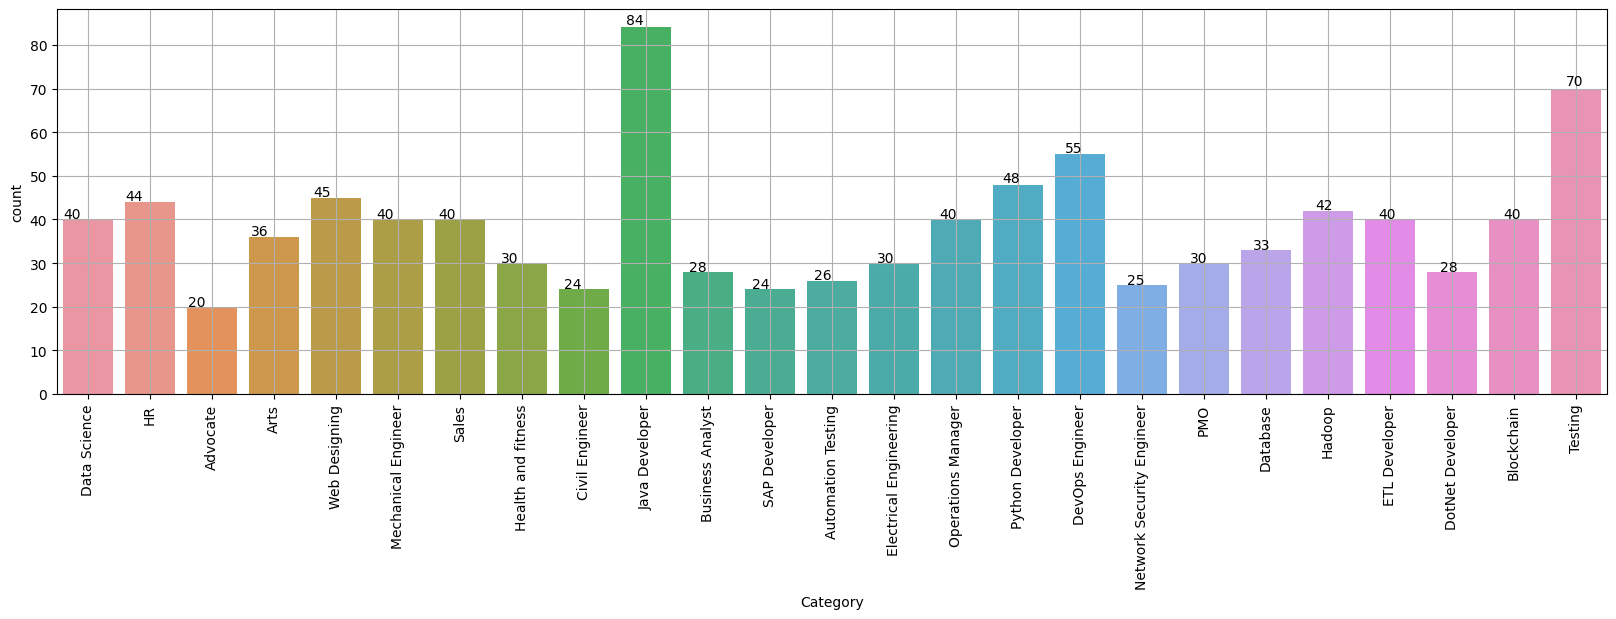

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
plt.xticks(rotation = 90)
ax=sns.countplot(x="Category", data=data_resume)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()
plt.show()

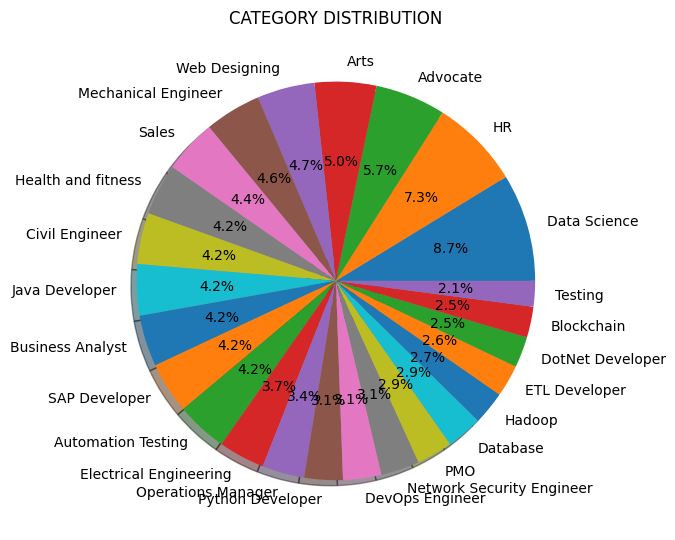

In [5]:
from matplotlib.gridspec import GridSpec
targetCounts = data_resume['Category'].value_counts()
targetLabels  = data_resume['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(3, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [36]:
## to clean the resume, all kind of noises must removed (urls,hashtags ...)
##
import re
def clean_resume(dataresume_text):
    cleaned_resume_text = re.sub('http|https',' ',dataresume_text) ## to remove urls
    cleaned_resume_text = re.sub('#\S+', ' ',dataresume_text)  ## to remove hashtages
    cleaned_resume_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',dataresume_text) ## to remove ponctuations
    cleaned_resume_text = re.sub(r'|â|¢|R|â|¢','  ',dataresume_text)
    return cleaned_resume_text

In [37]:
data_resume['cleaned_resume'] = ''
data_resume['cleaned_resume'] = data_resume.Resume.apply(lambda x:clean_resume(x))

In [42]:
data_resume.head(10000)

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills Python SAP HANA...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills: Proficient in MS offic...
958,Testing,â Willingness to accept the challenges. â ..., Willingness to accept the challenges. ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...","PE SONAL SKILLS Quick learner, ..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTE SKILLS & SOFTWA E KNOWLEDGE MS-Powe...


In [54]:
df = pd.DataFrame(data_resume)
data_set = df.drop(['Resume'],axis = 1)
data_set

,Category,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills Python SAP HANA...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: Proficient in MS offic...
958,Testing, Willingness to accept the challenges. ...
959,Testing,"PE SONAL SKILLS Quick learner, ..."
960,Testing,COMPUTE SKILLS & SOFTWA E KNOWLEDGE MS-Powe...


In [56]:
dataset = data_set[['cleaned_resume','Category']]
dataset


,cleaned_resume,Category
0,Skills * Programming Languages: Python (pandas...,Data Science
1,Education Details \r\nMay 2013 to May 2017 B.E...,Data Science
2,"Areas of Interest Deep Learning, Control Syste...",Data Science
3,Skills Python SAP HANA...,Data Science
4,"Education Details \r\n MCA YMCAUST, Faridab...",Data Science
...,...,...
957,Computer Skills: Proficient in MS offic...,Testing
958, Willingness to accept the challenges. ...,Testing
959,"PE SONAL SKILLS Quick learner, ...",Testing
960,COMPUTE SKILLS & SOFTWA E KNOWLEDGE MS-Powe...,Testing


In [78]:
my_classes = data_set.Category.value_counts().index.to_list()
my_classes

['Java Developer',
 'Testing',
 'DevOps Engineer',
 'Python Developer',
 'Web Designing',
 'HR',
 'Hadoop',
 'Blockchain',
 'ETL Developer',
 'Operations Manager',
 'Data Science',
 'Sales',
 'Mechanical Engineer',
 'Arts',
 'Database',
 'Electrical Engineering',
 'Health and fitness',
 'PMO',
 'Business Analyst',
 'DotNet Developer',
 'Automation Testing',
 'Network Security Engineer',
 'SAP Developer',
 'Civil Engineer',
 'Advocate']

In [63]:

import logging
import pandas as pd
import numpy as np
from numpy import random
##import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

X = df.cleaned_resume
y = df.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [79]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

#%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_classes))

accuracy 0.8788927335640139
                           precision    recall  f1-score   support

           Java Developer       1.00      0.17      0.29         6
                  Testing       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.71      0.83         7
         Python Developer       1.00      1.00      1.00        11
            Web Designing       1.00      0.67      0.80         9
                       HR       1.00      0.36      0.53        11
                   Hadoop       1.00      1.00      1.00        11
               Blockchain       1.00      1.00      1.00         9
            ETL Developer       1.00      0.89      0.94        19
       Operations Manager       0.00      0.00      0.00        11
             Data Science       1.00      1.00      1.00         9
                    Sales       1.00      1.00      1.00         9
      Mechanical Engineer       1.00      0.76      0.87        17
                     Arts       1

/home/balha/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/balha/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/balha/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# import nltk
# from nltk.corpus import stopwords
# import strings
# from worldcloud import WorldCloud

# stopwords_set = set(stopwords.words('english')+['``',"''"])
# all_words = []
# sentences = data_resume['Resume'].values
# clean_sentences= ''
# for i in range(0,160):
#     clean_text = clean_resume(sentences[i])
#     clean_sentences = clean_sentences + 1
#     requiredwords = nltk.world_tokenize(clean_text)
    